In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data


<Figure size 640x480 with 0 Axes>

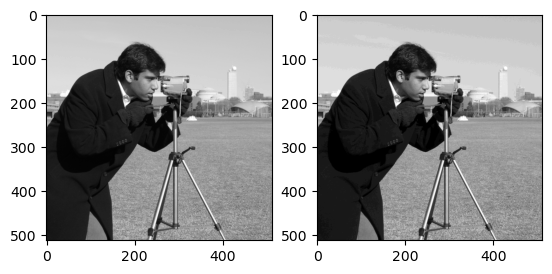

In [8]:

# Read the image
image = data.camera()

# Get the desired number of intensity levels (in integer powers of 2)
num_levels = int(input('Enter the desired number of intensity levels: '))

# Calculate the step size
steps = pow(2,num_levels)-1
step = 256 // steps

# Create a new image with the reduced intensity levels
new_image = image.copy()

# Iterate through all the pixels
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Get the intensity value of the current pixel
        intensity = image[i, j]
        
        # Reduce the intensity level by dividing by the step size and rounding down
        new_intensity = intensity // step * step
        
        # Set the new intensity value for the current pixel
        new_image[i, j] = new_intensity

# Save the new image
# cv2.imwrite('new_image.png', new_image)
# plot the images
plt.gray()
f,arr=plt.subplots(1,2)
arr[0].imshow(image)
image2=255-image
arr[1].imshow(new_image)


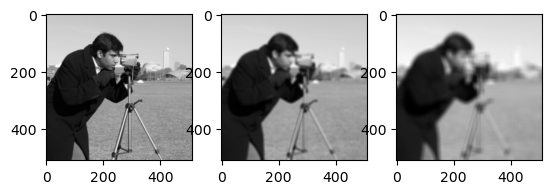

In [16]:

# Define the kernel sizes
kernel_sizes = [3, 10, 20]
x,arr_1=plt.subplots(1,3)
i=0
# Perform averaging for each kernel size
for kernel_size in kernel_sizes:
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    filtered_image = cv2.filter2D(image, -1, kernel)
    arr_1[i].imshow(filtered_image)
    i+=1
    # cv2.imshow(f"Averaged image with kernel size {kernel_size}x{kernel_size}", filtered_image)
    # cv2.waitKey(0)
i=0
# cv2.destroyAllWindows()


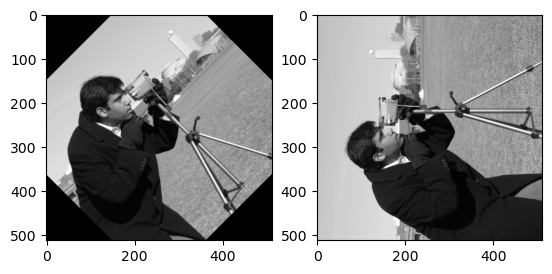

In [17]:

# Load the image
# image = cv2.imread('image.png')

# Get the image dimensions
(h, w) = image.shape[:2]

# Define the rotation angles
angles = [45, 90]
x,arr_1=plt.subplots(1,2)
# Perform rotation for each angle
for angle in angles:
    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, M, (w, h))
    arr_1[i].imshow(rotated_image)
    i+=1
    # Show the rotated image
    # cv2.imshow(f"Rotated image by {angle} degrees", rotated_image)
    # cv2.waitKey(0)

cv2.destroyAllWindows()


In [ ]:


# Load the image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Define the block sizes
block_sizes = [3, 5, 7]

# Perform pooling for each block size
for block_size in block_sizes:
    pooled_image = cv2.blur(image, (block_size, block_size))
    cv2.imshow(f"Pooled image with block size {block_size}x{block_size}", pooled_image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
